# Фреймворк PyTorch

In [1]:
 # Бібліотеки для візуалізації
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
 
# Бібліотеки Pytorch
import torch 
import torchvision # тут лежить mnist, cifar та багато інших датасетів та трансформацій для картинок
import torch.nn as nn # тут лежать усі шари
import torch.utils.data as data # робота із завантажувачем даних
import torchvision.transforms as transforms
import torchvision.datasets as dsets #робота з класом Датасет
from torch.autograd import Variable # для автоматичного диференціатора
 
# Візуалізація графа
from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time
 
import seaborn as sns
sns.set_style('darkgrid')

## Збереження та завантаження моделі

In [ ]:
# Збереження та завантаження всієї моделі
torch.save(linear, 'model.pkl')
model = torch.load('model.pkl') # зберігаються навіть стани оптимізатора, результату епох тощо.

# Рекомендується зберегти лише параметри моделі (з метою безпеки)
torch.save(linear.state_dict(), 'params.pkl')
linear.load_state_dict(torch.load('params.pkl'))

## **Класифікуємо MNIST**

Задаємо параметри

In [8]:
inputSize = 784
numClasses = 10
numEpochs = 20
learningRate = 0.001 
hidden = 500
hidden2 = 100

Завантажуємо дані

In [9]:
# Завантажимо MNIST
batchSize = 100

# Навчальна вибірка
trainDataset = dsets.MNIST(root='D:/MyDoc/Projects/_NN/Lesson_PyTorch/data/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
# Тестова вибірка
testDataset = dsets.MNIST(root='D:/MyDoc/Projects/_NN/Lesson_PyTorch/data/', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (підготовка даних для мережі)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Який датасет
                                           batch_size=batchSize, # На скільки batch поділено
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Який датасет
                                          batch_size=batchSize, # На скільки batch поділено
                                          shuffle=False)


In [10]:
# Подивимося на нашу вибірку
dataIter = iter(trainLoader) # Якою вибіркою пройдемося
trainX, trainY = next(dataIter) # Привласнюємо поточний batch

In [11]:
trainX.shape

torch.Size([100, 1, 28, 28])

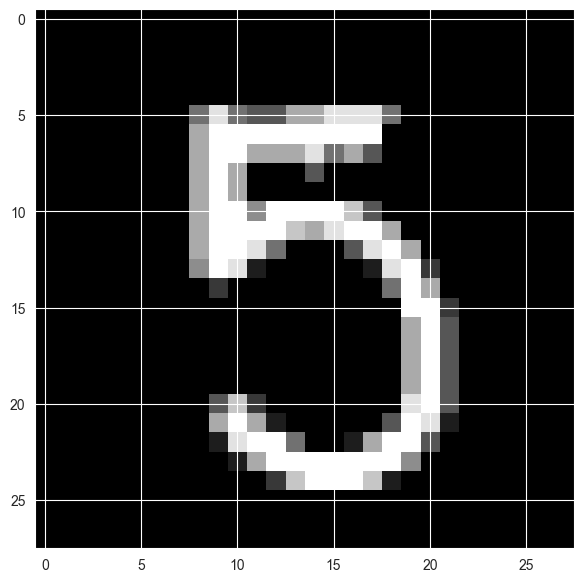

In [23]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[1, 0], cmap='gray')
plt.show()

## Моделі архітектури

In [13]:
# Створюємо клас
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super().__init__() # успадковуємо всі властивості + додаємо своє
        self.layer1 = nn.Linear(inputSize, hidden_size1) # перший шар - лінійний
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size1,hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, num_classes)
        self.softmax = nn.Softmax(dim=1) # Оскільки завдання класифікації, то функція активації softmax

    def forward(self, x): # Тут ми прописуємо принципи, за якими дані проходитимуть через мережу
        out = self.layer1(x)  # вихід першого шару
        out = self.relu(out) # застосовуємо функцію активації до виходу першого шару
        out = self.layer2(out) # застосовуємо функцію активації до виходу першого шару
        out = self.relu(out) # застосовуємо функцію активації до виходу першого шару
        out = self.layer3(out)
        out = self.softmax(out) # застосовуємо функцію активації до другого шару
        return out

model = Classification(inputSize, hidden,hidden2, numClasses) # Створюємо об'єкт нашої повної мережі

In [14]:
# class Static_model(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.layer1 = nn.Linear(784, 200)
#     self.layer2 = nn.Linear(200, 10)
#     self.relu = nn.ReLU()
#     self.softmax = nn.Softmax(dim=1)
#     # self.tanh = nn.Tanh()

#   def forward(self, x):
#     x = self.layer1(x)
#     x = self.relu(x)
#     x = self.softmax(self.layer2(x))
#     return x

In [15]:
trainX.view(-1, 28*28).shape # view операція ідентична reshape, за винятком, що вона змінює розмір масиву тільки для даної ітерації

torch.Size([100, 784])

In [16]:
trainX.size()

torch.Size([100, 1, 28, 28])

## Функція помилки та оптимізатор

In [17]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимізатор
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model.train() # перехід у режим навчання (опціонально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

## Навчаємо модель

Епоха: [1/20], Похибка: 2.2847
Епоха: [2/20], Похибка: 2.2646
Епоха: [3/20], Похибка: 2.2485
Епоха: [4/20], Похибка: 2.1688
Епоха: [5/20], Похибка: 2.1426
Епоха: [6/20], Похибка: 2.0927
Епоха: [7/20], Похибка: 1.9895
Епоха: [8/20], Похибка: 1.8055
Епоха: [9/20], Похибка: 1.6099
Епоха: [10/20], Похибка: 1.5306
Епоха: [11/20], Похибка: 1.3343
Епоха: [12/20], Похибка: 1.0923
Епоха: [13/20], Похибка: 1.0876
Епоха: [14/20], Похибка: 0.8011
Епоха: [15/20], Похибка: 0.8103
Епоха: [16/20], Похибка: 0.7563
Епоха: [17/20], Похибка: 0.7764
Епоха: [18/20], Похибка: 0.7290
Епоха: [19/20], Похибка: 0.6051
Епоха: [20/20], Похибка: 0.5152


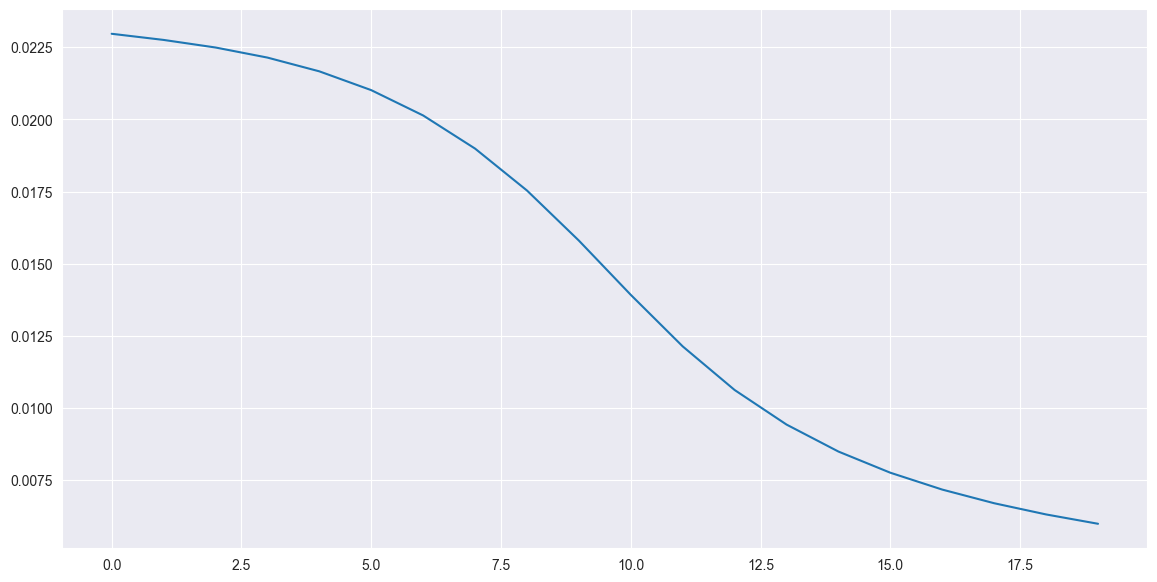

In [18]:
for epoch in range(numEpochs): # кількість епох
    lossTot = 0 # втрати в сукупності

    for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
        images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
        optimizer.zero_grad() # обнулюємо градієнт
        outputs = model(images) # тут наше передбачення
        loss = criterion(outputs.log(), labels) # рахуємо похибку 
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.detach().data # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

In [104]:
print(labels)
print(outputs.log())

tensor([7, 5, 3, 1, 6, 1, 7, 1, 8, 2, 1, 5, 2, 1, 3, 7, 9, 8, 3, 2, 5, 8, 5, 5,
        2, 4, 1, 6, 6, 3, 3, 9, 7, 1, 9, 5, 5, 0, 6, 5, 5, 7, 7, 7, 2, 8, 1, 7,
        9, 5, 9, 2, 5, 3, 1, 8, 9, 7, 5, 5, 4, 6, 6, 7, 5, 1, 8, 0, 4, 4, 4, 3,
        7, 7, 4, 2, 9, 6, 5, 8, 4, 3, 0, 1, 6, 4, 4, 7, 5, 4, 2, 6, 1, 5, 6, 2,
        1, 0, 5, 2])
tensor([[-2.3030, -2.3033, -2.3020, -2.3012, -2.3021, -2.3036, -2.3027, -2.3039,
         -2.3016, -2.3024],
        [-2.3026, -2.3041, -2.3006, -2.3013, -2.3023, -2.3050, -2.3031, -2.3049,
         -2.3004, -2.3015],
        [-2.3021, -2.3035, -2.3011, -2.3024, -2.3019, -2.3028, -2.3053, -2.3018,
         -2.3024, -2.3026],
        [-2.3030, -2.3035, -2.3014, -2.3012, -2.3024, -2.3033, -2.3040, -2.3034,
         -2.3014, -2.3023],
        [-2.3023, -2.3036, -2.3019, -2.3017, -2.3026, -2.3030, -2.3040, -2.3027,
         -2.3015, -2.3025],
        [-2.3027, -2.3033, -2.3025, -2.3022, -2.3034, -2.3028, -2.3030, -2.3025,
         -2.3016, -2.3018],
     

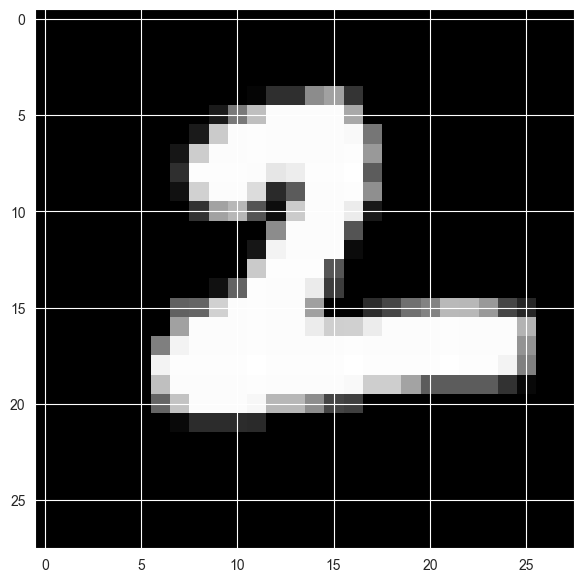

Правильна відповідь tensor(2)


In [44]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[4, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[8])

In [46]:
x = model(trainX[4].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей


tensor([[3.1674e-03, 2.9371e-04, 8.3780e-01, 1.8303e-03, 1.5085e-04, 3.1786e-03,
         1.4210e-01, 1.6678e-05, 1.1426e-02, 3.9432e-05]])
torch.return_types.max(
values=tensor([0.8378]),
indices=tensor([2]))


## Перевірка роботи моделі

In [47]:
correct = 0
total = 0

model.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels
    outputs = model(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 85 %


In [48]:
print(outputs[0], torch.max(outputs.data, 1))
print(result)

tensor([0.0053, 0.0625, 0.0647, 0.0985, 0.0047, 0.0731, 0.0078, 0.0042, 0.6700,
        0.0092], grad_fn=<SelectBackward0>) torch.return_types.max(
values=tensor([0.6700, 0.4878, 0.8567, 0.7099, 0.3254, 0.6556, 0.4127, 0.2078, 0.9465,
        0.8615, 0.4750, 0.9332, 0.4865, 0.5716, 0.2833, 0.6674, 0.6809, 0.7910,
        0.5093, 0.7232, 0.8100, 0.8318, 0.3395, 0.8869, 0.4620, 0.2462, 0.3751,
        0.6641, 0.6066, 0.8830, 0.8501, 0.9291, 0.4639, 0.6020, 0.5854, 0.8895,
        0.6213, 0.4131, 0.9182, 0.9611, 0.4857, 0.3449, 0.8282, 0.3898, 0.3577,
        0.6397, 0.9055, 0.4044, 0.7250, 0.8460, 0.8792, 0.7354, 0.9145, 0.5314,
        0.3515, 0.3776, 0.8163, 0.8052, 0.6669, 0.2696, 0.5235, 0.9193, 0.6683,
        0.8853, 0.8234, 0.6960, 0.8753, 0.6098, 0.9106, 0.8972, 0.3632, 0.8402,
        0.6085, 0.5277, 0.7087, 0.4436, 0.6692, 0.6326, 0.8268, 0.8259, 0.2807,
        0.6197, 0.7651, 0.9763, 0.9262, 0.3118, 0.5015, 0.7388, 0.6656, 0.9811,
        0.9348, 0.4805, 0.5186, 0.8289, 0.949

## **Візуалізація нейромережі**

In [49]:
print(model)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [50]:
# !pip install torchviz

In [51]:
import torchviz

In [52]:
model.named_parameters()

<generator object Module.named_parameters at 0x000002D60B2CDA10>

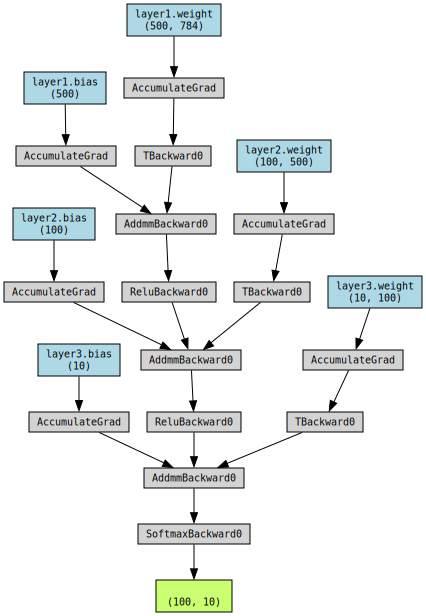

In [53]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [122]:
model_zm = Classification(inputSize, hidden,hidden2, numClasses) # Створюємо об'єкт нашої повної мережі
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

## змінені функція помилки та оптимізатор

In [123]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_zm.parameters(), lr=learningRate)  # оптимізатор
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model_zm.train() # перехід у режим навчання (опціонально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [124]:
batchSize = 100

## Навчаємо модель

F:\data_science_course\git\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Епоха: [1/20], Похибка: 50.5160
Епоха: [2/20], Похибка: 52.6365
Епоха: [3/20], Похибка: 55.8257
Епоха: [4/20], Похибка: 50.5878
Епоха: [5/20], Похибка: 52.2844
Епоха: [6/20], Похибка: 55.9257
Епоха: [7/20], Похибка: 49.0031
Епоха: [8/20], Похибка: 52.7731
Епоха: [9/20], Похибка: 59.9909
Епоха: [10/20], Похибка: 46.8144
Епоха: [11/20], Похибка: 50.4552
Епоха: [12/20], Похибка: 53.6691
Епоха: [13/20], Похибка: 59.0588
Епоха: [14/20], Похибка: 49.4231
Епоха: [15/20], Похибка: 58.5586
Епоха: [16/20], Похибка: 64.9688
Епоха: [17/20], Похибка: 49.1310
Епоха: [18/20], Похибка: 58.1062
Епоха: [19/20], Похибка: 52.1118
Епоха: [20/20], Похибка: 53.8568


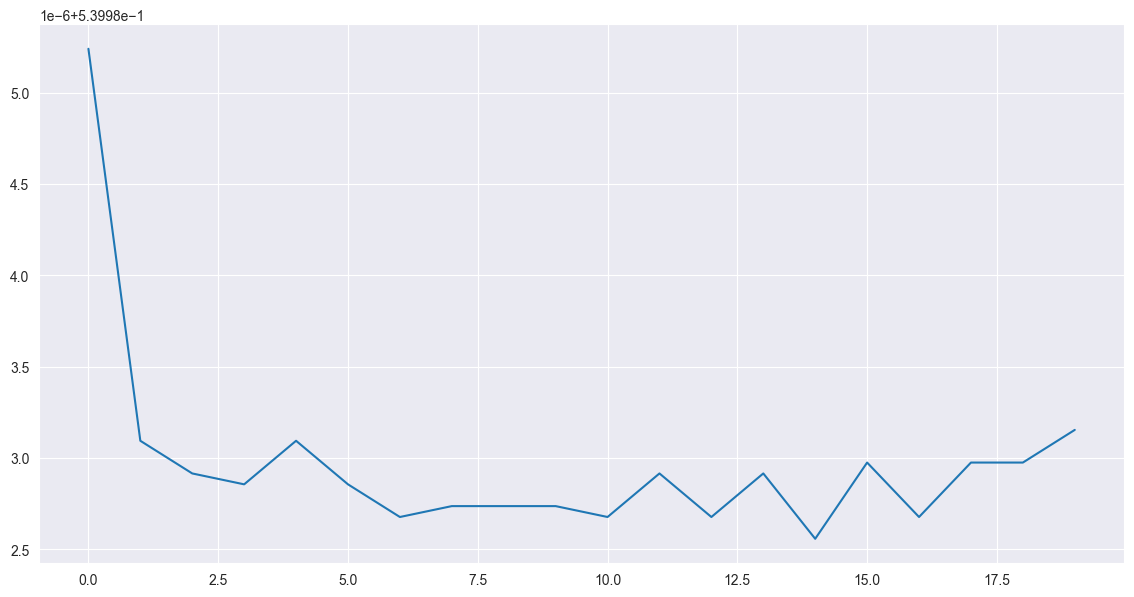

In [125]:
for epoch in range(numEpochs): # кількість епох
    lossTot = 0 # втрати в сукупності

    for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
        images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
        optimizer.zero_grad() # обнулюємо градієнт
        outputs = model_zm(images) # тут наше передбачення
        loss = criterion(outputs.log(), labels.view(-1,1).float()) # рахуємо похибку 
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.detach().data # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

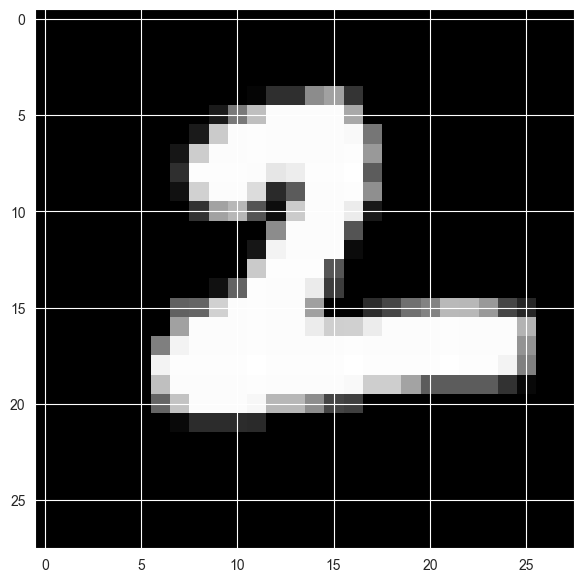

Правильна відповідь tensor(2)


In [126]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[4, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[8])

In [127]:
x = model_zm(trainX[4].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]])
torch.return_types.max(
values=tensor([0.1000]),
indices=tensor([2]))


## Перевірка роботи моделі

In [128]:
correct = 0
total = 0

model_zm.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels
    outputs = model_zm(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 9 %


In [129]:
print(outputs[0], torch.max(outputs.data, 1))
print(result)

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000], grad_fn=<SelectBackward0>) torch.return_types.max(
values=tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1001, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.100